In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as st
from IPython.display import display, Markdown
from scipy.optimize import fsolve
from sklearn.linear_model import LinearRegression

from common_plotting import read_data, plot, years, months, yearsFmt, add_thp
from common_analysis import analyse_ohms, PT385_eq, Trh, Rt, Rs23

plt.rcParams["figure.figsize"] = (20,10)

In [9]:
thp_data, data = read_data(['ks3458a-4w-res-log.csv', 'ks3458a-2w-res-log.csv', 'ks3458a-4w-res-w-delay-log.csv'])
res_2w = data['ks3458a-2w-res-log.csv']
res_4w = pd.concat([data['ks3458a-4w-res-log.csv'], data['ks3458a-4w-res-w-delay-log.csv']])

/home/alson/shared/projects/personal/electronics/t&m/automation/dmm-logging/common_plotting.py:29: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  data_dict = {filename: add_thp(thp_sorted, pd.read_csv(filename, parse_dates=['datetime']))


In [10]:
res_4w_results = analyse_ohms(res_4w)
res_2w_results = analyse_ohms(res_2w)

In [5]:
res_4w_results[(res_4w_results.dut == 'SR104') & (res_4w_results.range == 10000)]

,dut,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,
23,SR104,19,10000.048989,0.000218,0.000949,10000.0,37.836020
25,SR104,23,10000.050774,0.000192,0.000920,10000.0,37.784630
32,SR104,72,10000.026283,0.000513,0.004354,10000.0,38.268837
36,SR104,33,10000.021148,0.000568,0.003263,10000.0,38.368661
39,SR104,95,10000.027913,0.000805,0.007844,10000.0,38.130769
53,SR104,25,10000.021682,0.000145,0.000723,10000.0,39.922625
118,SR104,26,10000.027959,0.000187,0.000955,10000.0,34.202006
120,SR104,83,10000.006031,0.000341,0.003110,10000.0,38.738069
128,SR104,10,10000.014187,0.000347,0.001098,10000.0,36.019707


In [6]:
res_4w_results

,dut,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,
1,Guildline 9330,2,100003.519750,0.050750,0.071771,100000.0,32.991504
3,Fluke 742A,19,1.000050,0.000002,0.000007,10.0,32.246351
4,HP 11103A,21,1000.020622,0.000153,0.000701,1000.0,32.380255
5,Guildline 9330,41,100005.682002,0.021629,0.138496,100000.0,33.284156
6,HP 11103A,23,1000.021772,0.000139,0.000668,1000.0,33.611320
...,...,...,...,...,...,...,...
164,Fluke 5450A,3650,10000.451428,0.000067,0.004026,10000.0,35.523010
165,SR104,2854,10000.049065,0.000105,0.005592,10000.0,34.500364
166,Fluke 5450A,7736,10000.452868,0.000256,0.022543,10000.0,33.258335


In [11]:
res_4w_results[res_4w_results.range==10000.0]

,dut,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,
13,HP 11103A,13,1000.023311,0.000242,0.000874,10000.0,30.607242
14,GR1440-2,14,10051.796610,0.000946,0.003540,10000.0,31.181836
15,GR1440-3,24,9999.919127,0.000620,0.003037,10000.0,31.830225
16,GR1440-4,34,10001.285458,0.000228,0.001328,10000.0,31.978309
23,SR104,19,10000.048989,0.000218,0.000949,10000.0,37.836020
25,SR104,23,10000.050774,0.000192,0.000920,10000.0,37.784630
26,GR1440-2,18,10051.760228,0.000258,0.001094,10000.0,37.824382
27,GR1440-3,23,9999.723406,0.000203,0.000972,10000.0,37.899847
28,GR1440-4,18,10001.188416,0.000215,0.000912,10000.0,38.020584


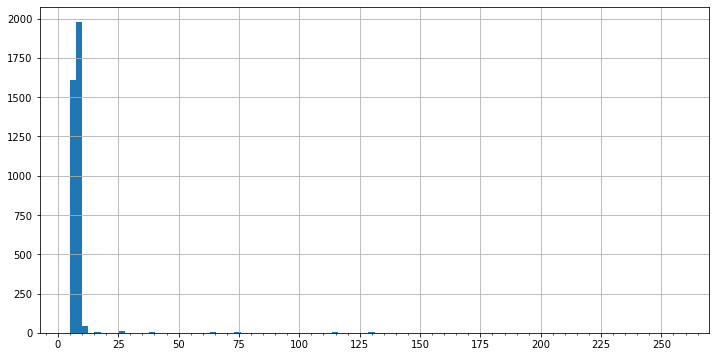

In [49]:
diff_2w = (res_2w.reset_index()['datetime'] - res_2w.reset_index()['datetime'].shift(1))
diff_2w = diff_2w[diff_2w < pd.Timedelta(minutes=5)]
fig = plt.figure(figsize=(12,6))
diff_2w.dt.total_seconds().hist(bins=100)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))

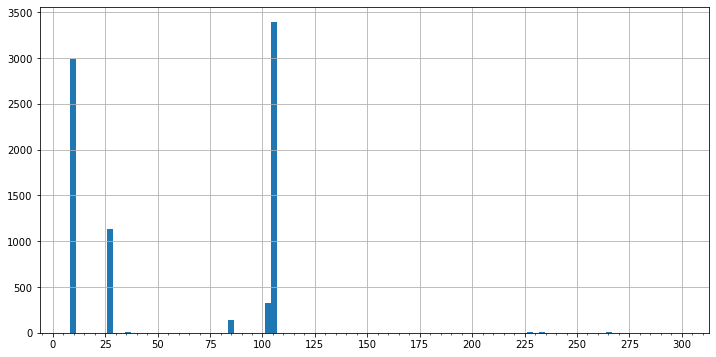

In [50]:
diff_4w = (res_4w.reset_index()['datetime'] - res_4w.reset_index()['datetime'].shift(1))
diff_4w = diff_4w[diff_4w < pd.Timedelta(minutes=5)]
fig = plt.figure(figsize=(12,6))
diff_4w.dt.total_seconds().hist(bins=100)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(25))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(5))

In [7]:
print(res_4w_results[(res_4w_results.dut == 'SR104') | (res_4w_results.dut == 'Fluke 5450A')].tail(20))

               dut  count       ohm_mean   ohm_sem   ohm_std     range  \
group                                                                    
144    Fluke 5450A      8    1000.067378  0.000055  0.000156    1000.0   
145    Fluke 5450A      8       9.999361  0.000003  0.000009      10.0   
147    Fluke 5450A     39   10000.426022  0.000215  0.001340   10000.0   
148          SR104     24   10000.039960  0.000250  0.001226   10000.0   
150    Fluke 5450A     20       9.999369  0.000002  0.000008      10.0   
152    Fluke 5450A     21    1000.070933  0.000025  0.000113    1000.0   
154    Fluke 5450A     19    1000.071195  0.000024  0.000106    1000.0   
155    Fluke 5450A     18  100004.624611  0.001956  0.008297  100000.0   
157    Fluke 5450A     18  100004.650400  0.001466  0.006220  100000.0   
158    Fluke 5450A     41   10000.434586  0.000461  0.002953   10000.0   
159          SR104    226   10000.039967  0.000078  0.001170   10000.0   
160    Fluke 5450A     25   10000.4225

In [5]:
res_2w_results

,dut,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,
1,Keithley 5155,1,9.795073e+08,NaN,NaN,1.000000e+09,33.420703
2,Guildline 95206,23,9.999141e+06,165.846003,795.369491,1.000000e+07,33.246026
3,Keithley 5155-guard-lo,40,9.955731e+08,17105.645965,108185.604194,1.000000e+09,32.729536
4,Keithley 5155-guard-open,40,9.963116e+08,37016.161240,234110.759510,1.000000e+09,32.926118
5,SR104,49,1.000005e+04,0.000087,0.000612,1.000000e+04,37.393754
6,F742A,82,1.000021e+06,0.017589,0.159279,1.000000e+06,37.532429
7,GR1440-5,421,9.999451e+05,0.057257,1.174821,1.000000e+06,37.921195
8,Guildline 95206,191,1.000067e+07,0.445146,6.152039,1.000000e+07,38.743398
9,Keithley 5155,145,9.894328e+08,15289.122403,184105.413448,1.000000e+09,38.424479


In [6]:
res_2w_results[res_2w_results.dut == 'Guildline 95206']

,dut,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,
2,Guildline 95206,23,9.999141e+06,165.846003,795.369491,10000000.0,33.246026
8,Guildline 95206,191,1.000067e+07,0.445146,6.152039,10000000.0,38.743398
12,Guildline 95206,410,1.000051e+07,1.745363,35.340917,10000000.0,39.686418
20,Guildline 95206,285,1.000038e+07,0.311602,5.260439,10000000.0,34.145824
31,Guildline 95206,102,1.000034e+07,6.631496,66.974829,10000000.0,36.856430
36,Guildline 95206,136,1.000043e+07,0.117317,1.368142,10000000.0,37.386172
44,Guildline 95206,99,1.000061e+07,47.838293,475.985006,10000000.0,37.652002


In [7]:
res_2w_results[(res_2w_results.dut == 'P4017') | (res_2w_results.dut == 'P410')]

,dut,count,ohm_mean,ohm_sem,ohm_std,range,temperature_mean
group,,,,,,,
11,P4017,154,1.000005e+07,5.453510,67.676275,10000000.0,39.779197
30,P4017,38,1.000002e+07,4.204487,25.918201,10000000.0,33.888502
32,P4017,42,1.000012e+07,3.267533,21.176035,10000000.0,39.238728
37,P410,531,1.000013e+07,0.502107,11.570281,10000000.0,37.705457
43,P4017,262,1.000012e+07,0.759286,12.290112,10000000.0,37.613620


# Temperature coefficients

## P4017

In [2]:
data = read_data(['ks3458a-time-p4017-10M-601-log.csv'])
p4017_data = data[1]['ks3458a-time-p4017-10M-601-log.csv']
thp = data[0]

In [34]:
plot(thp, p4017_data, ['ag3458a_2_ohm'], [] )

NameError: name 'thp' is not defined

## Comparing 3458A with and without ACAL

In [35]:
thp_data, data = read_data(['ks3458a1-k2000-x2-sr104-log.csv', 'ks3458a1-wo-acal-k2000-x2-sr104-log.csv', 'ks3458a-k2000-x2-sr104-log.csv', 'ks3458a-wo-acal-k2000-x2-sr104-log.csv', 'ks3458a-dcv-tc-log-w-acal.csv'])
ks3458a2_w_acal = data['ks3458a-k2000-x2-sr104-log.csv']
ks3458a2_wo_acal = data['ks3458a-wo-acal-k2000-x2-sr104-log.csv']
ks3458a1_w_acal = data['ks3458a1-k2000-x2-sr104-log.csv']
ks3458a1_wo_acal = data['ks3458a1-wo-acal-k2000-x2-sr104-log.csv']
ks3458a_dc_w_acal = data['ks3458a-dcv-tc-log-w-acal.csv']

In [36]:
def add_sr104_temp(data, ohm_column_name):
    base_name, _, unit = ohm_column_name.rpartition('_')
    assert unit == 'ohm'
    temp_column_name = f'{base_name}_degC'
    data[temp_column_name] = Trh(data[ohm_column_name])

def add_pt100_temp(data, ohm_column_name):
    base_name, _, unit = ohm_column_name.rpartition('_')
    assert unit == 'ohm'
    temp_column_name = f'{base_name}_degC'
    data[temp_column_name] = data[ohm_column_name].apply(lambda resistance: fsolve(PT385_eq, 25, args=(resistance,))[0])

def correct_sr104(data, uncorrected_column_name, temperature_column):
    base_name, _, unit = uncorrected_column_name.rpartition('_')
    relative_column_name = f'{base_name}_ppm'
    nominal_sr104 = Rt(data[temperature_column])
    data[relative_column_name] = (data[uncorrected_column_name] / nominal_sr104 - 1) * 1e6

def make_sr104_relative(data, absolute_column_name):
    base_name, unit, _ = absolute_column_name.rsplit('_', 2)
    relative_column_name = f'{base_name}_ppm'
    data[relative_column_name] = (data[absolute_column_name] - Rs23)/Rs23 * 1e6

def interplolate_temp(data, temp_column_name):
    interpolated_column_name = temp_column_name + '_interpolated'
    data[interpolated_column_name] = data[temp_column_name].interpolate()

def clean_data(data, ks3458a_number):
    cleaned_data = data.copy()
    add_sr104_temp(cleaned_data, 'k2000_temp_ohm')
    add_pt100_temp(cleaned_data, 'k2000_20_pt100_ohm')
    correct_sr104(cleaned_data, f'ag3458a_{ks3458a_number}_ohm', 'k2000_temp_degC')
#     make_sr104_relative(data, 'ag3458a_2_ohm_corrected')
    interplolate_temp(cleaned_data, f'temp_{ks3458a_number}')
    cleaned_data.drop(['k2000_temp_ohm', 'k2000_20_pt100_ohm', f'ag3458a_{ks3458a_number}_ohm', f'temp_{ks3458a_number}'], axis=1, inplace=True)
    return cleaned_data

def filter_acal_points(data, ks3458a_number):
    is_acal = data[f'last_acal_{ks3458a_number}'] != data[f'last_acal_{ks3458a_number}'].shift(1)
    return data[is_acal]

def plot_sr104(data, ppm_column, ks3458a_temp_column, ks3458a_number, with_acal):
    acal_data = filter_acal_points(data, ks3458a_number)
    
    fig = plt.figure()
    ax = plt.gca()
    lns = []
    lns.append(ax.plot(data.index, data[ppm_column], '.', color='lightblue', label='SR104 deviation (ppm)')[0])
    lns.append(ax.plot(acal_data.index, acal_data[ppm_column], 'o', color='purple', label='SR104 deviation ACAL (ppm)')[0])
    y2 = ax.twinx()
    lns.append(y2.plot(data.index, data[ks3458a_temp_column], '.', color='red', label='temperature')[0])
    ax.set_title(f'Resistance and temperature over time {"with" if with_acal else "without"} ACAL')
    ax.legend(handles=lns)
    ax.set_xlabel('Time')
    ax.set_ylabel('Resistance relative to corrected nominal value (uOhm/Ohm)')
    y2.set_ylabel('Temperature (°C)')
    
    fit_data = data.dropna()
    regressor = LinearRegression()
    regressor.fit(fit_data[ks3458a_temp_column].values.reshape(-1, 1), fit_data[ppm_column])
    temps = np.arange(data[ks3458a_temp_column].min(), data[ks3458a_temp_column].max(), 0.1)
    fig2 = plt.figure()
    plt.plot(data[ks3458a_temp_column], data[ppm_column], '.', color='lightblue', label="Measurement")
    plt.plot(acal_data[ks3458a_temp_column], acal_data[ppm_column], 'o', color='purple', label="ACAL")
    plt.plot(temps, regressor.predict(temps.reshape(-1, 1)), color='orange', label="Linear fit")
    plt.title(f'Resistance function temperature coefficient {"with" if with_acal else "without"} ACAL')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Resistance relative to corrected nominal value (uOhm/Ohm)')
    plt.legend()
    plt.text(data[ks3458a_temp_column].min(), data[ppm_column].min(), f"TC = {regressor.coef_[0]:.2f} ppm/°C")

def plot_ks3458a_r207_tempco(data, ppm_column, ks3458a_temp_column, ks3458a_number):
    acal_data = filter_acal_points(data, ks3458a_number)
    plt.figure()
    fit_data = acal_data.dropna()
    regressor = LinearRegression()
    regressor.fit(fit_data[ks3458a_temp_column].values.reshape(-1, 1), fit_data[ppm_column])
    temps = np.arange(acal_data[ks3458a_temp_column].min(), acal_data[ks3458a_temp_column].max(), 0.1)
    plt.title('R207 temperature coefficient')
    plt.plot(acal_data[ks3458a_temp_column], acal_data[ppm_column], 'o', label='Measurement at ACAL')
    plt.plot(temps, regressor.predict(temps.reshape(-1, 1)), label="Linear fit")
    plt.legend()
    plt.ylabel('R207 relative change (uOhm/Ohm)')
    plt.xlabel('Temperature (°C)')
    plt.text(acal_data[ks3458a_temp_column].min(), acal_data[ppm_column].min(), f"TC = {regressor.coef_[0]:.2f} ppm/°C")

def process_sr104_k2000x2(data, ks3458a_number, with_acal):
    cleaned = clean_data(data, ks3458a_number)
    plot_sr104(cleaned, f'ag3458a_{ks3458a_number}_ppm', f'temp_{ks3458a_number}_interpolated', ks3458a_number, with_acal)
    if with_acal:
        plot_ks3458a_r207_tempco(cleaned, f'ag3458a_{ks3458a_number}_ppm', f'temp_{ks3458a_number}_interpolated', ks3458a_number)
        

### HP 3458A #1
#### With ACAL

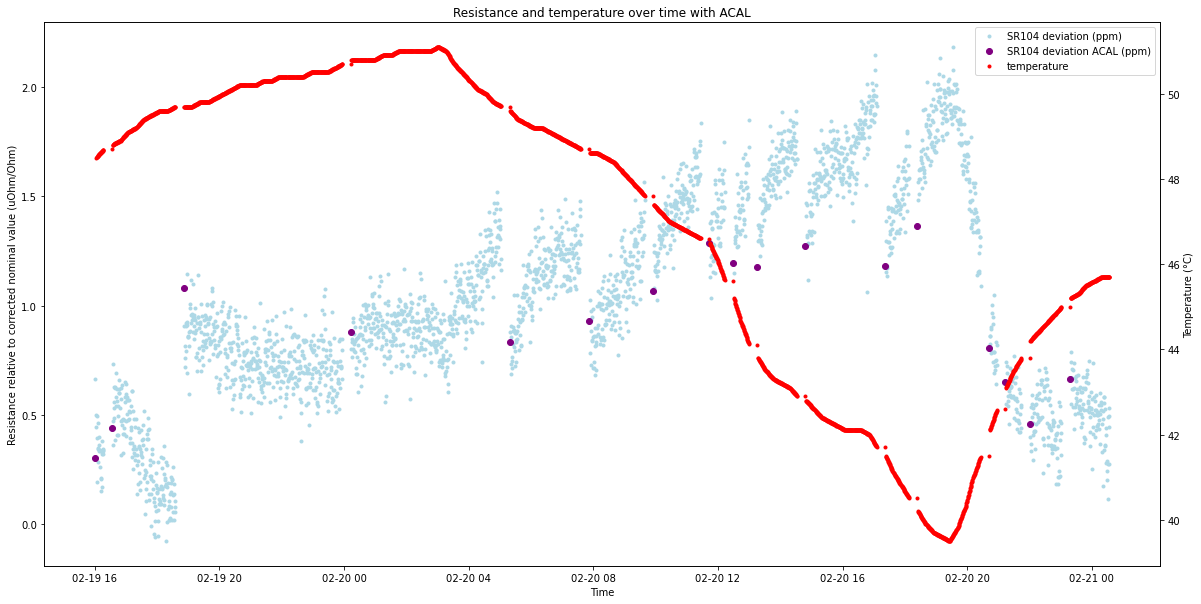

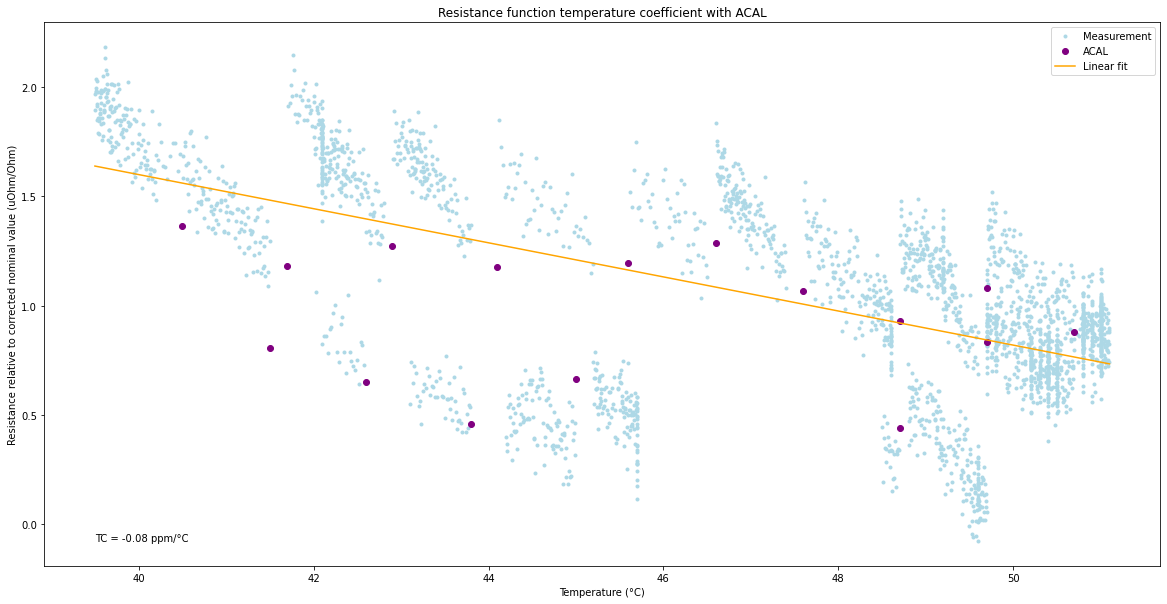

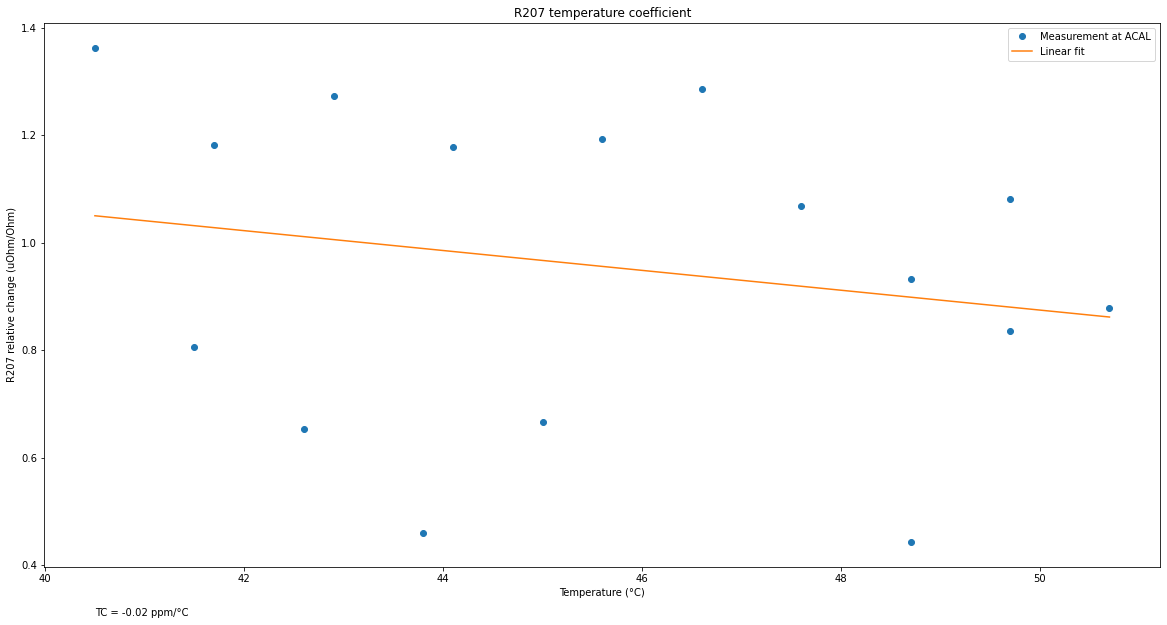

In [37]:
process_sr104_k2000x2(ks3458a1_w_acal[ks3458a1_w_acal.index > pd.Timestamp(2023,2,19,16)], 1, True)

#### Without ACAL

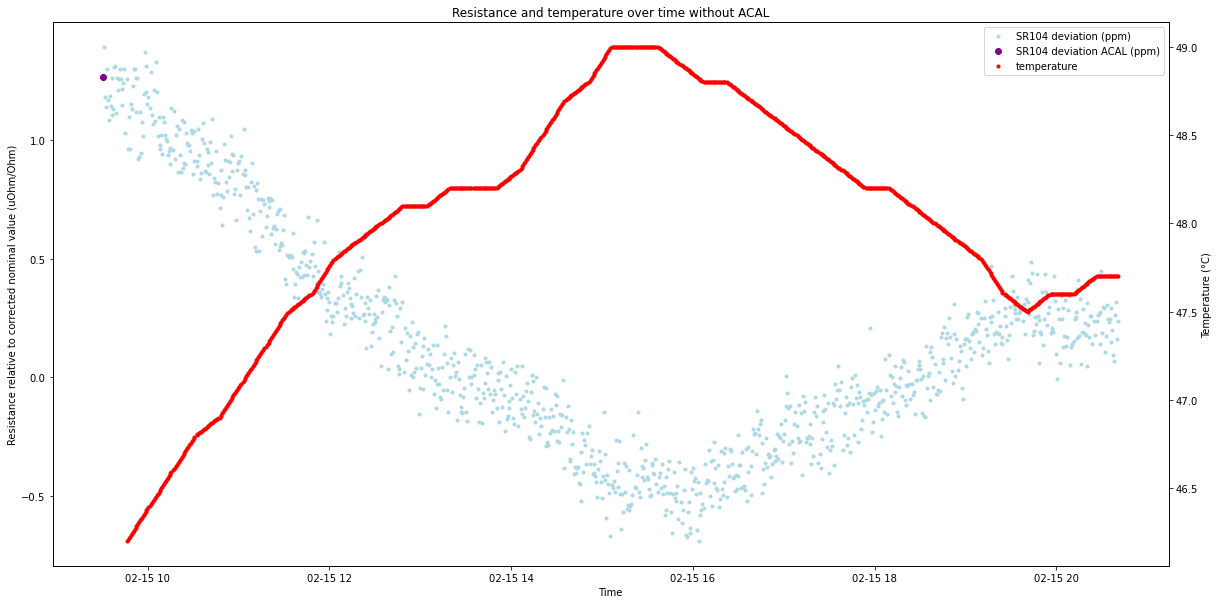

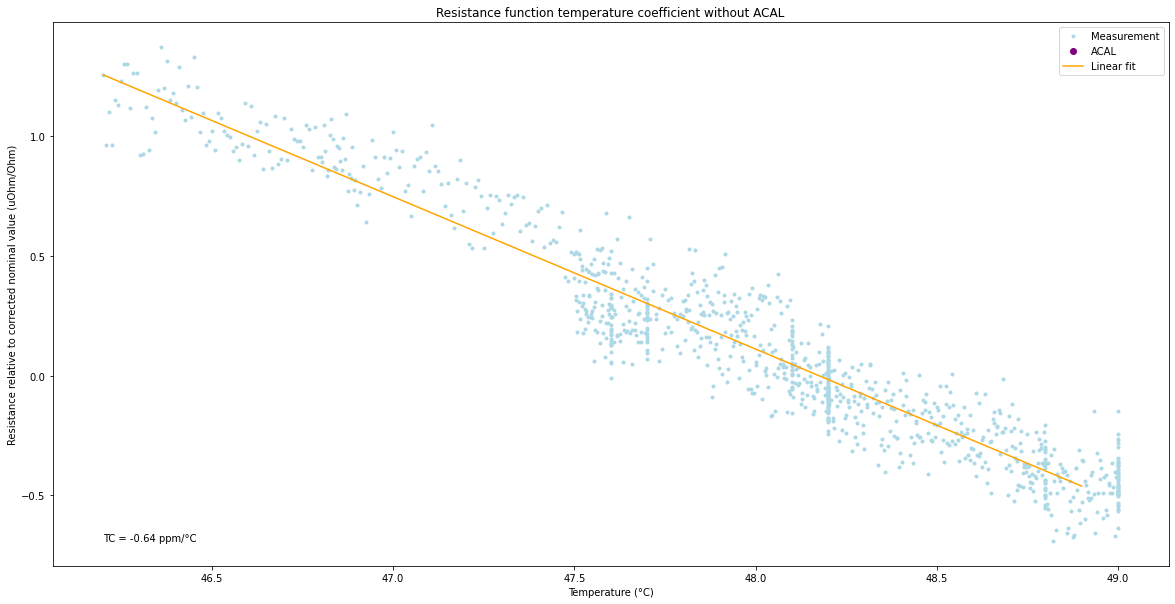

In [38]:
process_sr104_k2000x2(ks3458a1_wo_acal[(ks3458a1_wo_acal.index > pd.Timestamp(2023,2,15,9,15)) & (ks3458a1_wo_acal.index < pd.Timestamp(2023,2,15,21))], 1, False)

## HP 3458A #2
#### With ACAL

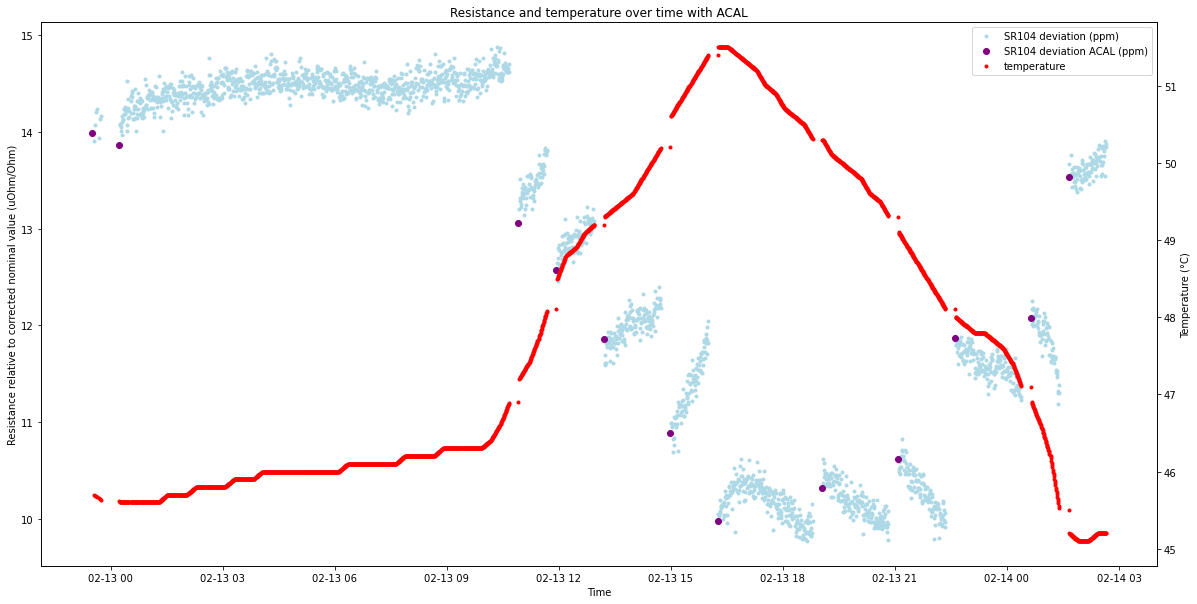

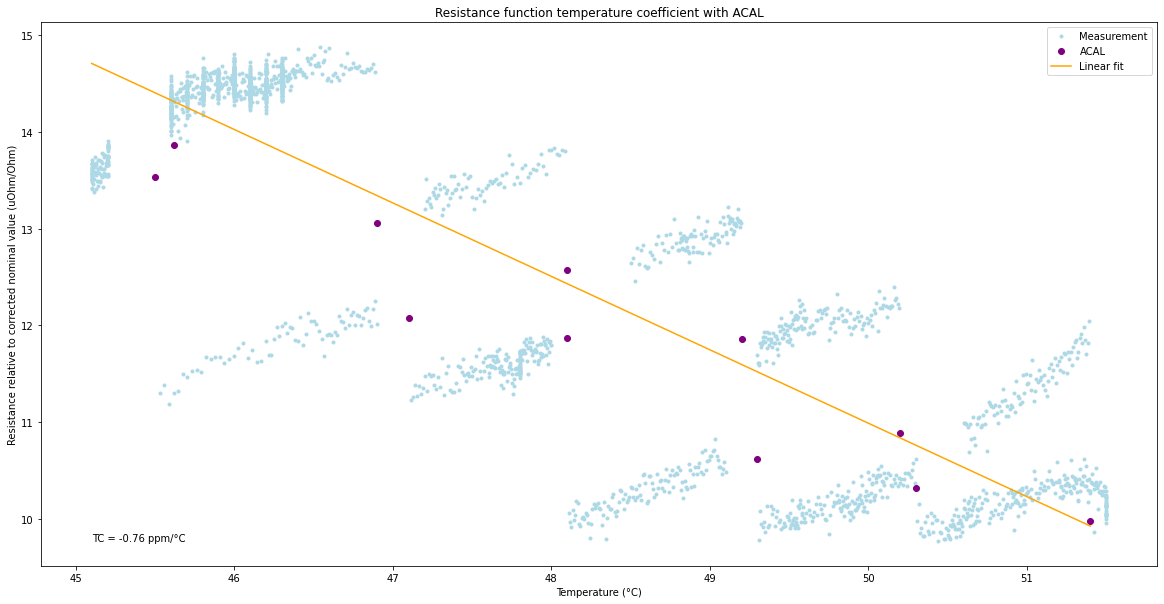

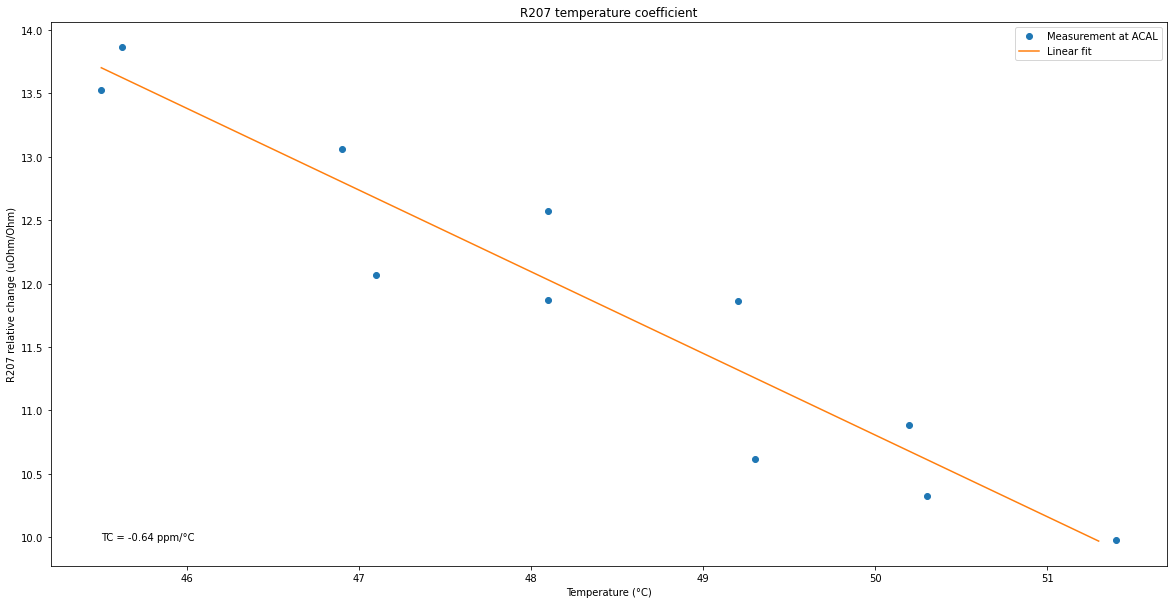

In [39]:
process_sr104_k2000x2(ks3458a2_w_acal, 2, True)

#### Without ACAL

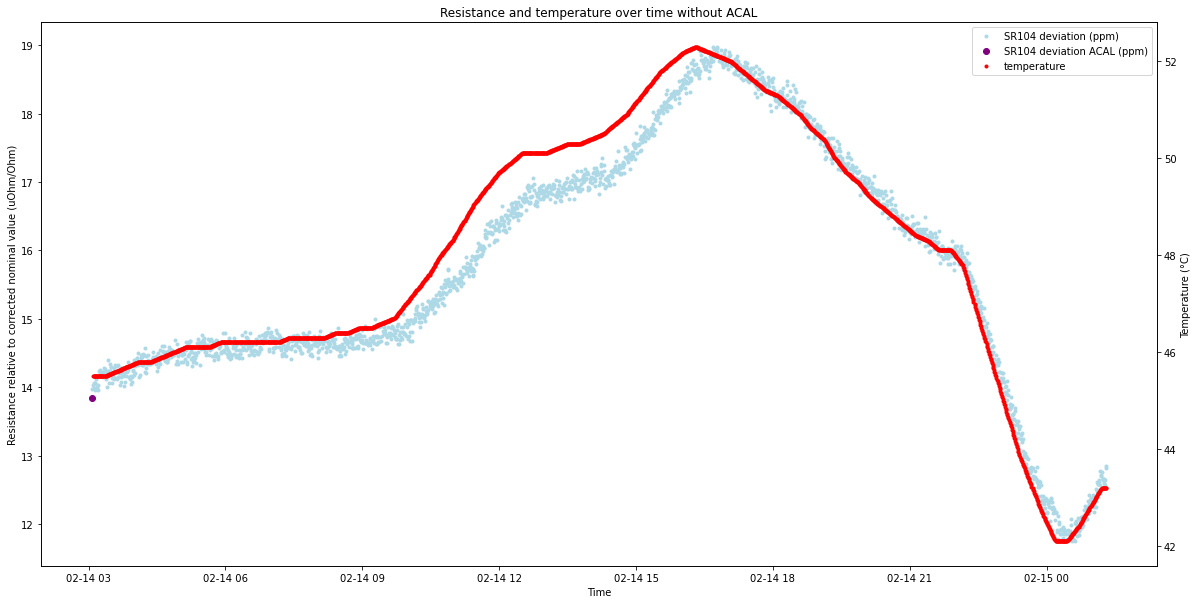

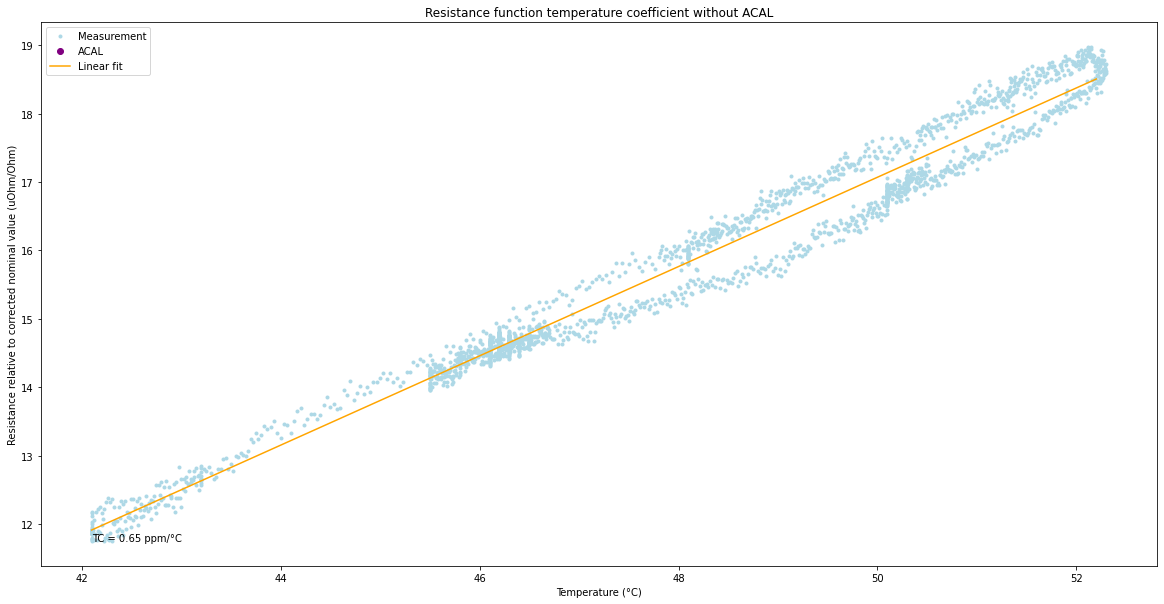

In [40]:
process_sr104_k2000x2(ks3458a2_wo_acal, 2, False)

## HP 3458A #2 DCV ACAL (since it has a lower LTZ1000 setpoint)

In [41]:
def clean_dcv_tc(data, ks3458a_number):
    cleaned = data.copy()
    cleaned[f'temp_{ks3458a_number}_interpolated'] = cleaned[f'temp_{ks3458a_number}'].interpolate()
    cleaned[f'dcv_{ks3458a_number}_ppm'] = (cleaned[f'ag3458a_{ks3458a_number}_dcv'] - 10) / 10 * 1e6
    return cleaned

def plot_dcv_tc(data, ks3458a_number):
    fit_data = data.dropna()
    regressor = LinearRegression()
    ks3458a_temp_column = f'temp_{ks3458a_number}_interpolated'
    ppm_column = f'dcv_{ks3458a_number}_ppm'
    regressor.fit(fit_data[ks3458a_temp_column].values.reshape(-1, 1), fit_data[ppm_column])
    temps = np.arange(data[ks3458a_temp_column].min(), data[ks3458a_temp_column].max(), 0.1)
    plt.title('LTZ1000 temperature coefficient')
    plt.plot(data[ks3458a_temp_column], data[ppm_column], 'o', label='Measurement at ACAL')
    plt.plot(temps, regressor.predict(temps.reshape(-1, 1)), label="Linear fit")
    plt.legend()
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Deviation from 10V (uV/V)')
    plt.text(data[ks3458a_temp_column].min(), data[ppm_column].min(), f"TC = {regressor.coef_[0]:.2e} ppm/°C")

def process_dcv_tc(data, ks3458a_number):
    cleaned = clean_dcv_tc(data, ks3458a_number)
    only_acal = filter_acal_points(cleaned, ks3458a_number)
    plot_dcv_tc(only_acal, ks3458a_number)

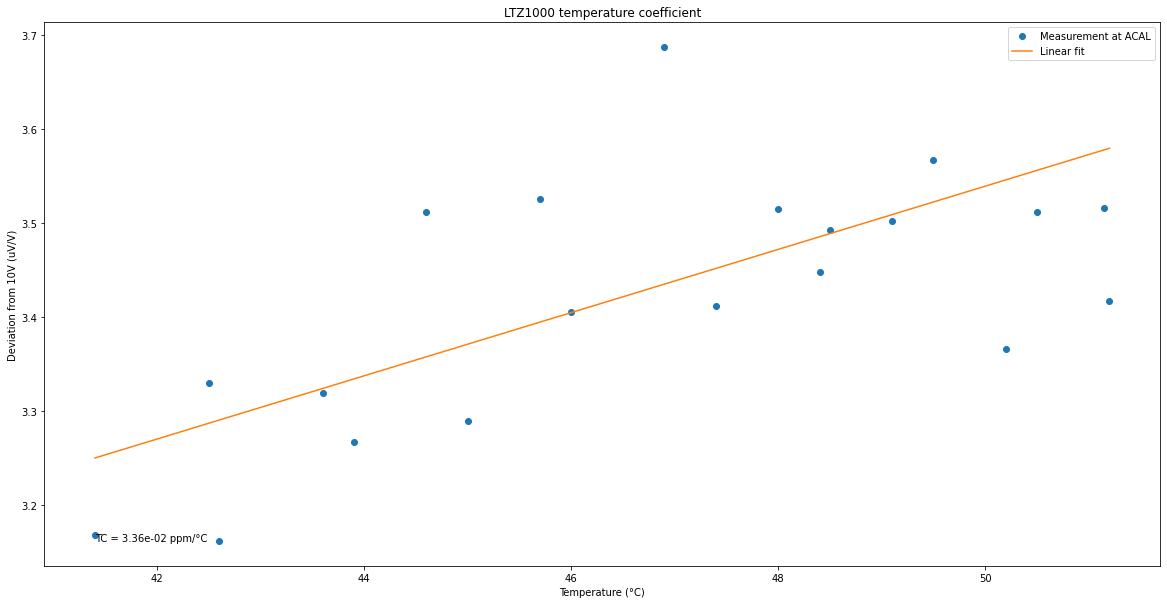

In [42]:
process_dcv_tc(ks3458a_dc_w_acal, 2)